In [ ]:
# Uninstall the conflicting versions first
!pip uninstall -y numpy gensim

# Reinstall the latest compatible versions
!pip install numpy gensim --upgrade

# Restart the runtime (necessary for new versions to load properly)
import os
os.kill(os.getpid(), 9)

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Importazione di stats
import warnings
warnings.filterwarnings('ignore')  # Ignora avvisi

In [3]:
# Carica i dati
file_path = "/content/spreading_results_final.csv"
print(f"Caricamento del file {file_path}...")
df = pd.read_csv(file_path)
df.describe()

Caricamento del file /content/spreading_results_final.csv...


,PathLength,LikertScore,r1_t1_AtoB,r1_t1_BtoA,r1_t10_AtoB,r1_t10_BtoA,r1_t100_AtoB,r1_t100_BtoA,r5_t1_AtoB,r5_t1_BtoA,r5_t10_AtoB,r5_t10_BtoA,r5_t100_AtoB,r5_t100_BtoA,r9_t1_AtoB,r9_t1_BtoA,r9_t10_AtoB,r9_t10_BtoA,r9_t100_AtoB,r9_t100_BtoA
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2.768000,1.871333,0.222425,0.604338,0.342230,0.635050,0.206550,0.434615,0.171471,0.300301,0.387975,0.576835,0.395573,0.572841,4.304345e-02,0.054402,0.268705,0.344121,0.425175,0.538351
std,0.726541,1.464767,0.528726,2.584445,0.307182,0.459122,0.309443,0.500703,0.657344,1.411562,0.269903,0.436835,0.240397,0.343839,2.240299e-01,0.280394,0.933221,1.169036,0.218879,0.299604
min,1.000000,1.000000,0.000000,0.000000,0.009530,0.018855,0.000000,0.000000,0.000000,0.000000,0.017523,0.029819,0.036476,0.072926,0.000000e+00,0.000000,0.000156,0.000213,0.039647,0.081540
25%,2.000000,1.000000,0.000131,0.000000,0.127906,0.313902,0.000000,0.000000,0.000011,0.000000,0.200350,0.289961,0.218918,0.328313,1.455927e-09,0.000000,0.013178,0.013749,0.258984,0.332032
50%,3.000000,1.000000,0.027421,0.000000,0.253562,0.530916,0.000000,0.318309,0.006044,0.000000,0.325687,0.473833,0.328644,0.510749,5.079766e-05,0.000000,0.032963,0.039017,0.394764,0.488810
75%,3.000000,2.000000,0.152578,0.011085,0.469764,0.834751,0.358008,0.706424,0.055521,0.000988,0.505378,0.746615,0.510827,0.729739,6.010615e-04,0.000002,0.158149,0.185993,0.536065,0.681297
max,4.000000,7.000000,5.025000,22.500000,2.312620,2.327997,2.298011,2.298011,8.680556,12.500000,2.317978,5.798440,1.714746,1.714746,3.002778e+00,2.500000,12.551274,10.843609,1.538080,2.621087


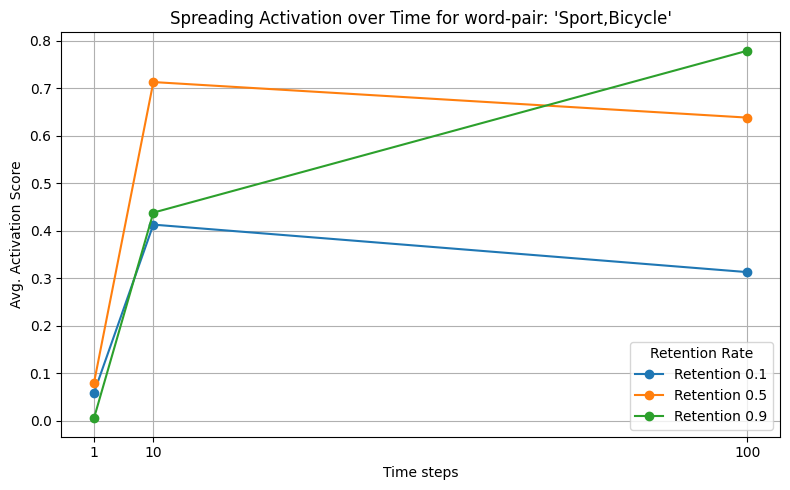

In [ ]:


# Load CSV
df = pd.read_csv("spreading_results_final.csv")

# Select the row of the word pair you want to plot
row = df[(df["Concept1"] == "sport") & (df["Concept2"] == "bicycle")].iloc[0]

# Set retention rates and time steps
retention_rates = [1, 5, 9]
time_steps = [1, 10, 100]

# Collect average activation values
activations = {}

for r in retention_rates:
    values = []
    for t in time_steps:
        a_to_b = row[f"r{r}_t{t}_AtoB"]
        b_to_a = row[f"r{r}_t{t}_BtoA"]
        avg = (a_to_b + b_to_a) / 2
        values.append(avg)
    activations[f"Retention {r/10:.1f}"] = values

# Plotting
plt.figure(figsize=(8, 5))
for label, values in activations.items():
    plt.plot(time_steps, values, marker='o', label=label)

plt.title("Spreading Activation over Time for word-pair: 'Sport,Bicycle'")
plt.xlabel("Time steps")
plt.ylabel("Avg. Activation Score")
plt.xticks(time_steps)
plt.legend(title="Retention Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# prompt: voglio creare un nuovo file csv che abbia solo le prime due colonne del file csv caricato nella cella prima

# Seleziona le prime due colonne
new_df = df.iloc[:, :2]

# Crea un nuovo file CSV
new_file_path = "/content/new_file.csv"  # Cambia il nome del file se necessario
new_df.to_csv(new_file_path, index=False)

print(f"Nuovo file CSV creato in: {new_file_path}")


Nuovo file CSV creato in: /content/new_file.csv


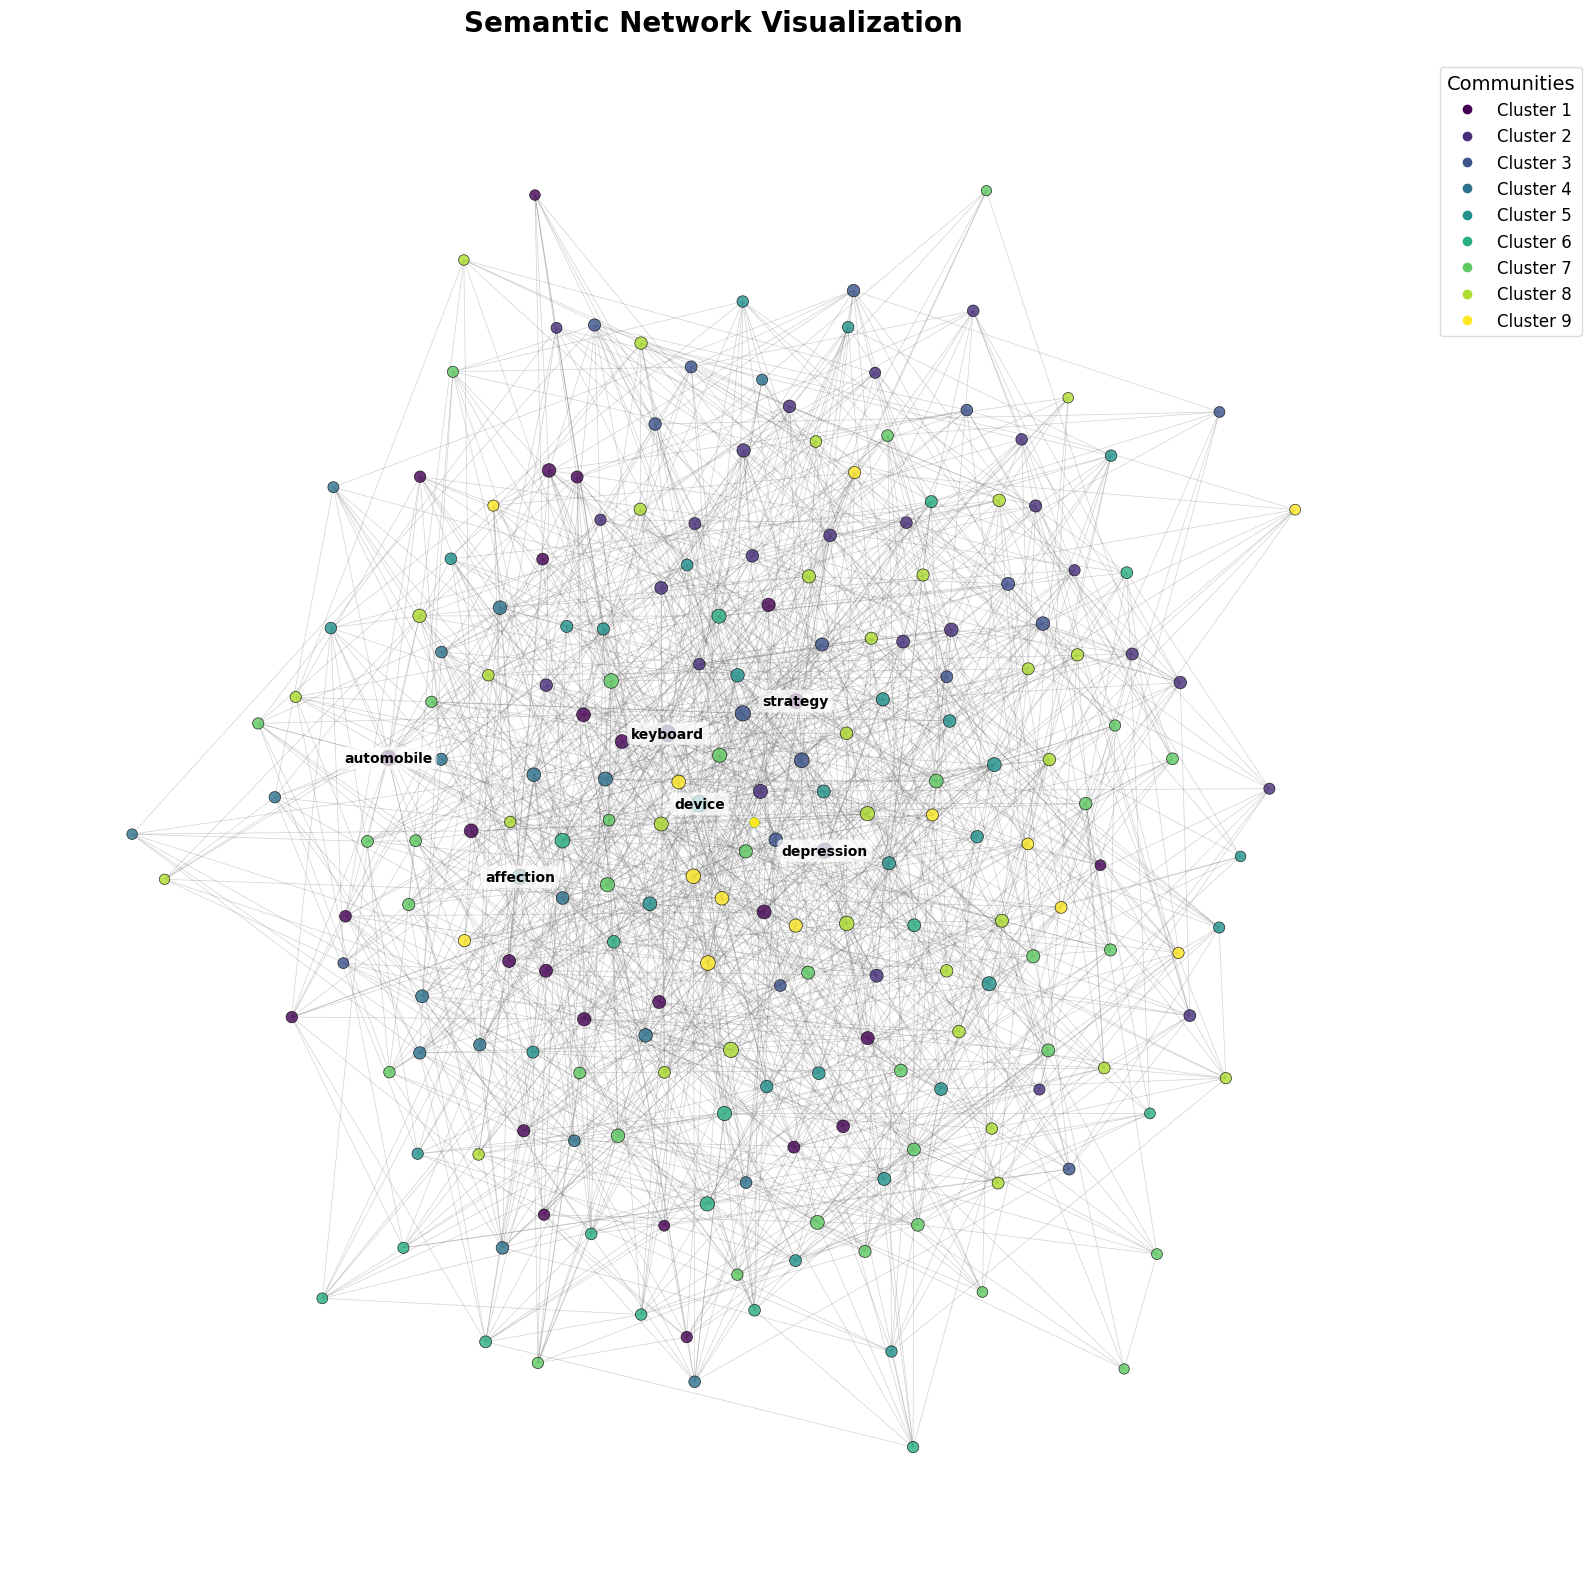

Network has 210 nodes and 1500 edges
Network density: 0.0684
Number of communities detected: 9


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from community import community_louvain

# Load the CSV file with word pairs
df = pd.read_csv("new_file.csv")  # Has columns 'Concept1' and 'Concept2'

# Create the graph
G = nx.from_pandas_edgelist(df, source='Concept1', target='Concept2')

# Calculate network metrics for node sizing
centrality = nx.betweenness_centrality(G)
degrees = dict(nx.degree(G))

# Community detection for coloring
partition = community_louvain.best_partition(G)
communities = max(partition.values()) + 1

# Create a custom colormap for communities
colors = plt.cm.viridis(np.linspace(0, 1, communities))
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=communities)

# Get node colors based on community
node_colors = [partition[node] for node in G.nodes()]

# Calculate better layout with more iterations for clarity
# Adjust k (repulsion) for better spacing
pos = nx.spring_layout(G, k=0.15, iterations=100, seed=42)

# Create the figure
plt.figure(figsize=(16, 16), facecolor='white')

# Draw edges with alpha for better visibility
nx.draw_networkx_edges(G, pos,
                      alpha=0.3,
                      edge_color='dimgray',
                      width=0.5)

# Draw nodes with size based on centrality and color based on community
node_size = [5000 * (centrality[n] + 0.01) for n in G.nodes()]
nx.draw_networkx_nodes(G, pos,
                      node_size=node_size,
                      node_color=node_colors,
                      cmap=cmap,
                      alpha=0.8,
                      edgecolors='black',
                      linewidths=0.5)

# Draw labels only for important nodes to reduce clutter
threshold = np.mean(list(degrees.values())) * 1.5
labels = {node: node for node in G.nodes() if degrees[node] >= threshold}
nx.draw_networkx_labels(G, pos,
                       labels=labels,
                       font_size=10,
                       font_weight='bold',
                       font_family='sans-serif',
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Add a title with shadow effect for better visibility
plt.title("Semantic Network Visualization", fontsize=20, fontweight='bold', pad=20)

# Add legend for communities
for i in range(communities):
    plt.plot([0], [0], 'o', color=cmap(i), label=f'Cluster {i+1}')

legend = plt.legend(title="Communities", loc='upper left', bbox_to_anchor=(1.01, 1),
                    fontsize=12, title_fontsize=14)
legend.get_frame().set_alpha(0.7)

plt.axis('off')
plt.tight_layout()
plt.savefig("Semantic_network_enhanced.png", dpi=300, bbox_inches='tight')
plt.show()

# Optional: Print some network statistics
print(f"Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
print(f"Network density: {nx.density(G):.4f}")
print(f"Number of communities detected: {communities}")

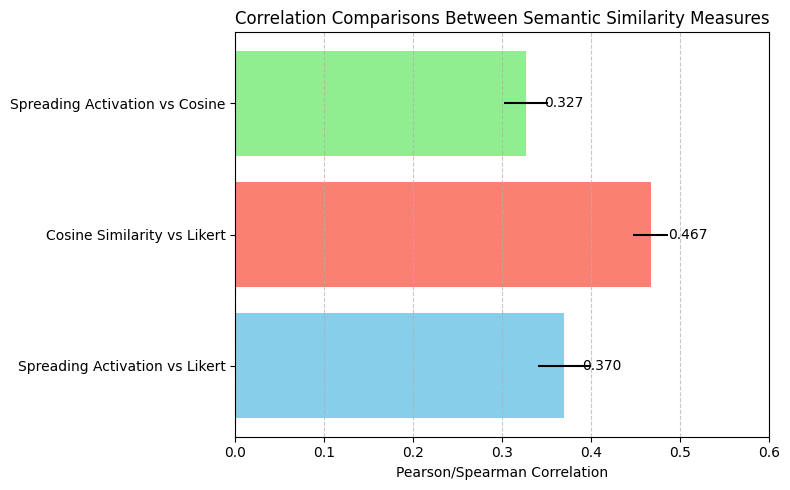

In [ ]:
import matplotlib.pyplot as plt

# Data
comparisons = [
    "Spreading Activation vs Likert",
    "Cosine Similarity vs Likert",
    "Spreading Activation vs Cosine"
]
correlations = [0.370, 0.467, 0.327]

# Optional: Add confidence intervals if available
error = [0.03, 0.02, 0.025]  # Example only, replace with real CI if known

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(comparisons, correlations, xerr=error, color=["skyblue", "salmon", "lightgreen"])
plt.xlabel("Pearson/Spearman Correlation")
plt.title("Correlation Comparisons Between Semantic Similarity Measures")
plt.xlim(0, 0.6)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: calculate number of nodes and edges of the graph

# Access the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 210
Number of edges: 1500


Density: 0.0684
Average Degree: 14.29


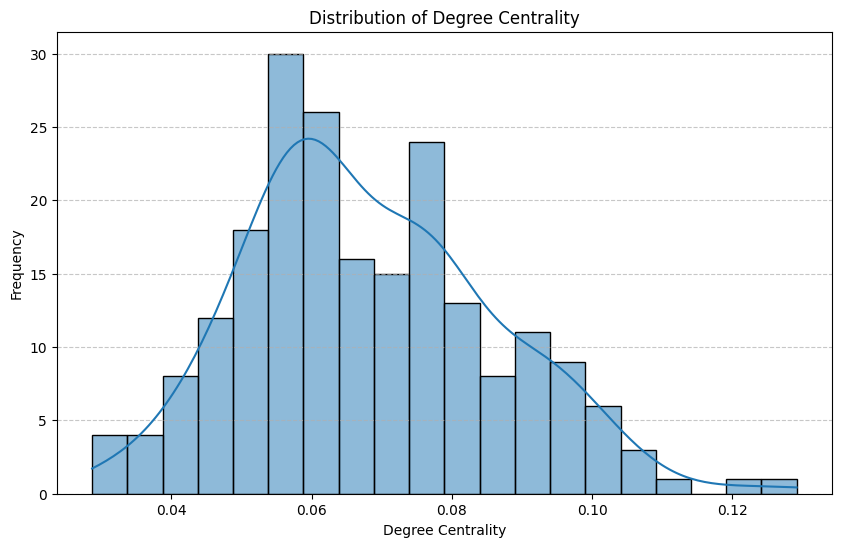

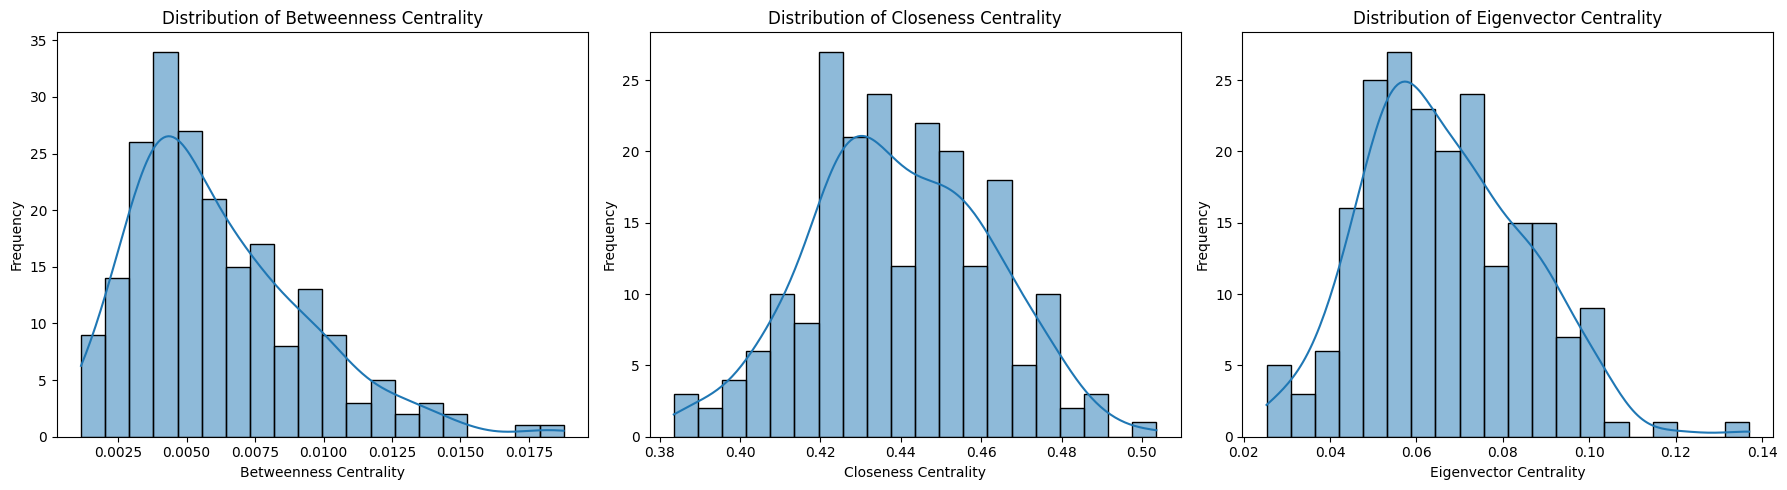

The graph is connected.


In [ ]:
# prompt: generate a good visualization of the graph characteristics

# Calculate basic graph characteristics
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
# avg_clustering_coefficient = nx.average_clustering(G) # This can be slow for large graphs
# transitivity = nx.transitivity(G) # This can be slow for large graphs

print(f"Density: {density:.4f}")
print(f"Average Degree: {avg_degree:.2f}")
# print(f"Average Clustering Coefficient: {avg_clustering_coefficient:.4f}")
# print(f"Transitivity: {transitivity:.4f}")


# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_values = list(degree_centrality.values())

# Plotting the degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins=20, kde=True)
plt.title("Distribution of Degree Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Optional: Calculate and visualize other centralities (can be computationally intensive)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000) # Increase iterations if needed

betweenness_values = list(betweenness_centrality.values())
closeness_values = list(closeness_centrality.values())
eigenvector_values = list(eigenvector_centrality.values())

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(betweenness_values, bins=20, kde=True)
plt.title("Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(closeness_values, bins=20, kde=True)
plt.title("Distribution of Closeness Centrality")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(eigenvector_values, bins=20, kde=True)
plt.title("Distribution of Eigenvector Centrality")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Check for connected components (if not one large component)
if not nx.is_connected(G):
  print(f"The graph is not connected.")
  num_connected_components = nx.number_connected_components(G)
  print(f"Number of connected components: {num_connected_components}")
  # You could also visualize the sizes of components if needed
  # component_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
  # print(f"Component sizes: {component_sizes}")
else:
  print(f"The graph is connected.")
  # Calculate diameter (only for connected graphs)
  # try:
  #   diameter = nx.diameter(G)
  #   print(f"Diameter: {diameter}")
  # except nx.NetworkXNoPath:
  #   print("Cannot calculate diameter: The graph is not connected or contains nodes with no paths.")




In [ ]:
# prompt: calculate  network density

# Calculate network density
density = nx.density(G)
print(f"Network density: {density}")


Network density: 0.0683526999316473


In [ ]:
# Crea colonne per le medie AtoB/BtoA se non esistono già
retention_values = [1, 5, 9]  # r = 0.1, 0.5, 0.9
time_values = [1, 10, 100]

for r in retention_values:
    for t in time_values:
        config = f"r{r}_t{t}_AVG"
        atob_col = f"r{r}_t{t}_AtoB"
        btoa_col = f"r{r}_t{t}_BtoA"

        if config not in df.columns and atob_col in df.columns and btoa_col in df.columns:
            df[config] = df[[atob_col, btoa_col]].mean(axis=1)
            print(f"Calcolata la media tra {atob_col} e {btoa_col} come {config}")
# Calcola correlazioni di Spearman con Likert per ogni configurazione
correlation_data = []

for r in retention_values:
    for t in time_values:
        config = f"r{r}_t{t}_AVG"

        if config in df.columns:
            # Spearman correlation
            corr_spearman, p_spearman = stats.spearmanr(df['LikertScore'], df[config])

            correlation_data.append({
                'Retention': r/10,  # r/10 per avere 0.1, 0.5, 0.9
                'Time': t,
                'Config': config,
                'SpearmanCorr': corr_spearman,
                'SpearmanP': p_spearman
            })

corr_df = pd.DataFrame(correlation_data)
corr_df.head()


Calcolata la media tra r1_t1_AtoB e r1_t1_BtoA come r1_t1_AVG
Calcolata la media tra r1_t10_AtoB e r1_t10_BtoA come r1_t10_AVG
Calcolata la media tra r1_t100_AtoB e r1_t100_BtoA come r1_t100_AVG
Calcolata la media tra r5_t1_AtoB e r5_t1_BtoA come r5_t1_AVG
Calcolata la media tra r5_t10_AtoB e r5_t10_BtoA come r5_t10_AVG
Calcolata la media tra r5_t100_AtoB e r5_t100_BtoA come r5_t100_AVG
Calcolata la media tra r9_t1_AtoB e r9_t1_BtoA come r9_t1_AVG
Calcolata la media tra r9_t10_AtoB e r9_t10_BtoA come r9_t10_AVG
Calcolata la media tra r9_t100_AtoB e r9_t100_BtoA come r9_t100_AVG


,Retention,Time,Config,SpearmanCorr,SpearmanP
0,0.1,1,r1_t1_AVG,0.267489,5.420855e-26
1,0.1,10,r1_t10_AVG,0.192821,4.977555e-14
2,0.1,100,r1_t100_AVG,0.126251,9.331314e-07
3,0.5,1,r5_t1_AVG,0.273099,4.582040e-27
4,0.5,10,r5_t10_AVG,0.367736,3.057191e-49


In [ ]:

# For the top few parameter combinations
top_params = corr_df.sort_values('SpearmanCorr', ascending=False).head(5)

# If you want to test if best is significantly better than second best
best = top_params.iloc[0]
second_best = top_params.iloc[3]

# Assign SpearmanCorr values to variables
r1 = best['SpearmanCorr']
r2 = second_best['SpearmanCorr']
n= len(df)


# ... (rest of your code)


In [ ]:
top_params

,Retention,Time,Config,SpearmanCorr,SpearmanP
4,0.5,10,r5_t10_AVG,0.367736,3.057191e-49
7,0.9,10,r9_t10_AVG,0.349772,2.087128e-44
8,0.9,100,r9_t100_AVG,0.336645,4.554619e-41
3,0.5,1,r5_t1_AVG,0.273099,4.582040e-27
6,0.9,1,r9_t1_AVG,0.272091,7.171582e-27


In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt, log, isnan

# First approach: Fisher's r-to-z transformation for comparing correlation coefficients
def fisher_r_to_z(r):
    """Transform Pearson's r to Fisher's z."""
    return 0.5 * (log((1 + r) / (1 - r)))

def compare_correlations(r1, r2, n, two_sided=True):
    """
    Compare two correlation coefficients for statistical significance

    Args:
        r1, r2: two correlation coefficients to compare
        n: sample size (number of word pairs)
        two_sided: whether to use a two-sided test

    Returns:
        z-score, p-value
    """
    # Fisher's r-to-z transformation
    z1 = fisher_r_to_z(r1)
    z2 = fisher_r_to_z(r2)

    # Standard error
    se = sqrt(1/(n-3) + 1/(n-3))

    # z-score
    z = (z1 - z2) / se

    # p-value
    if two_sided:
        p = 2 * (1 - stats.norm.cdf(abs(z)))
    else:
        p = 1 - stats.norm.cdf(z)

    return z, p

# Example usage with your top correlations
# Assuming df has n word pairs and best_params contains your top correlation values
n = len(df)  # Number of word pairs
r1 = top_params.iloc[0]['SpearmanCorr']  # Best correlation
r2 = top_params.iloc[3]['SpearmanCorr']  # Second-best correlation

z, p = compare_correlations(r1, r2, n)
print(f"Comparing r1={r1:.3f} vs r2={r2:.3f}:")
print(f"z-score: {z:.3f}, p-value: {p:.4f}")
print(f"The difference is {'not' if p > 0.05 else ''} statistically significant (α=0.05)")

Comparing r1=0.368 vs r2=0.273:
z-score: 2.889, p-value: 0.0039
The difference is  statistically significant (α=0.05)


In [ ]:
# prompt: give me a function that takes a file in input and adds the config column as calculated before to the file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Importazione di stats
import warnings
warnings.filterwarnings('ignore')  # Ignora avvisi

def add_config_column(file_path):
    """
    Loads a CSV file, calculates the average of 'AtoB' and 'BtoA' columns for
    different configurations, and adds the result as a new 'config' column.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The DataFrame with the added 'config' columns, or None if the file cannot be loaded.
    """
    try:
        print(f"Caricamento del file {file_path}...")
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Errore: File non trovato in {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Errore: Impossibile analizzare il file CSV {file_path}")
        return None


    retention_values = [1, 5, 9]  # r = 0.1, 0.5, 0.9
    time_values = [1, 10, 100]

    for r in retention_values:
        for t in time_values:
            config = f"r{r}_t{t}_AVG"
            atob_col = f"r{r}_t{t}_AtoB"
            btoa_col = f"r{r}_t{t}_BtoA"

            if config not in df.columns and atob_col in df.columns and btoa_col in df.columns:
                df[config] = df[[atob_col, btoa_col]].mean(axis=1)
                print(f"Calcolata la media tra {atob_col} e {btoa_col} come {config}")
    return df

# Example usage:
# Assuming your file is at /content/spreading_results_final.csv
file_path = "/content/spreading_results_final.csv"
updated_df = add_config_column(file_path)

if updated_df is not None:
    # Now you can save the updated DataFrame back to a CSV or perform further operations
    # updated_df.to_csv("updated_file.csv", index=False) # Example to save the updated dataframe
    print("Elaborazione completata.")


Caricamento del file /content/spreading_results_final.csv...
Calcolata la media tra r1_t1_AtoB e r1_t1_BtoA come r1_t1_AVG
Calcolata la media tra r1_t10_AtoB e r1_t10_BtoA come r1_t10_AVG
Calcolata la media tra r1_t100_AtoB e r1_t100_BtoA come r1_t100_AVG
Calcolata la media tra r5_t1_AtoB e r5_t1_BtoA come r5_t1_AVG
Calcolata la media tra r5_t10_AtoB e r5_t10_BtoA come r5_t10_AVG
Calcolata la media tra r5_t100_AtoB e r5_t100_BtoA come r5_t100_AVG
Calcolata la media tra r9_t1_AtoB e r9_t1_BtoA come r9_t1_AVG
Calcolata la media tra r9_t10_AtoB e r9_t10_BtoA come r9_t10_AVG
Calcolata la media tra r9_t100_AtoB e r9_t100_BtoA come r9_t100_AVG
Elaborazione completata.


In [ ]:
updated_df.head()
updated_df.to_csv("updated_file.csv", index=False) # Example to save the updated dataframe

In [ ]:
corr_df.head()

,Retention,Time,Config,SpearmanCorr,SpearmanP
0,0.1,1,r1_t1_AVG,0.267489,5.420855e-26
1,0.1,10,r1_t10_AVG,0.192821,4.977555e-14
2,0.1,100,r1_t100_AVG,0.126251,9.331314e-07
3,0.5,1,r5_t1_AVG,0.273099,4.582040e-27
4,0.5,10,r5_t10_AVG,0.367736,3.057191e-49


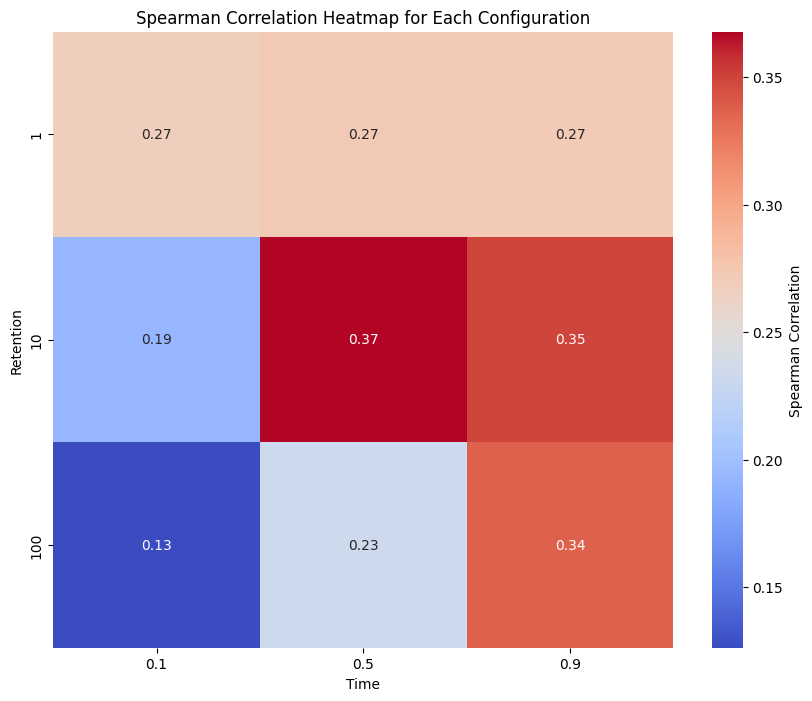

In [ ]:
# Crea matrice pivot per correlazioni di Spearman
pivot_spearman = corr_df.pivot_table(
    index='Time',
    columns='Retention',
    values='SpearmanCorr'
)
# Crea il heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_spearman, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Heatmap for Each Configuration')
plt.xlabel('Time')
plt.ylabel('Retention')
plt.show()


In [ ]:
#COSINE SIMILARITY !!!
import gensim
import gensim.downloader as api

# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))
w2v_model = api.load('glove-twitter-50')
import csv


# Carica il modello Word2Vec
w2v_model = api.load('glove-twitter-50')


def calculate_similarity(word1, word2):
    try:
        return w2v_model.similarity(word1, word2)
    except KeyError:
        return None  # Restituisce None se una delle parole non è nel vocabolario


def add_similarity_csv(input_file):

    with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        rows = list(reader)


    for i, row in enumerate(rows):
        if i == 0:

            row.append('Similarity')
        else:
            word1 = row[0]
            word2 = row[1]
            similarity = calculate_similarity(word1, word2)
            row.append(similarity)


    with open(input_file, mode='w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(rows)

input_file = '/content/updated_file.csv'  # Sostituisci con il percorso del tuo file di input
add_similarity_csv(input_file)


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
added_sim = pd.read_csv(input_file)
added_sim.to_csv('final_w_sim.csv', index=False)  # Save to 'output.csv' without the index
added_sim.head()
added_sim.shape

(1500, 32)

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

def analyze_correlations(csv_file):
    """
    Calculates correlations between specified columns in a CSV file.
    Removes rows with NaN or Inf values in the specified columns.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: DataFrame containing the calculated correlations.
                           Returns None if the file is not found or if
                           necessary columns are missing.
    """
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None

    required_cols = ['r5_t10_AVG', 'LikertScore', 'Similarity']
    if not all(col in df.columns for col in required_cols):
        print("Error: One or more required columns are missing in the DataFrame.")
        return None

    # Remove rows with NaN or Inf in specified columns
    for col in required_cols:
        df = df[np.isfinite(df[col])]  # Keep only rows with finite values in the current column

    # Calculate correlations
    corr_r5_10_likert, _ = pearsonr(df['r5_t10_AVG'], df['LikertScore'])
    corr_r5_10_sim, _ = pearsonr(df['r5_t10_AVG'], df['Similarity'])
    corr_likert_sim, _ = pearsonr(df['LikertScore'], df['Similarity'])

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Correlation': ['r5_10_AVG vs LikertScore', 'r5_t10_AVG vs Similarity', 'LikertScore vs Similarity'],
        'Value': [corr_r5_10_likert, corr_r5_10_sim, corr_likert_sim]
    })

    return results_df

corr_df2=analyze_correlations('/content/final_w_sim.csv')

In [ ]:
# prompt: modify the function "analyze correlations" such that it analyzes correlation between lickert scores and similarity, correlation bewteen similarity and all columns containing "AVG" and correlation bewteen lickert score and all columns containg "AVG"

def analyze_correlations(csv_file):
    """
    Calculates correlations between specified columns in a CSV file.
    Removes rows with NaN or Inf values in the specified columns.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: DataFrame containing the calculated correlations.
                           Returns None if the file is not found or if
                           necessary columns are missing.
    """
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None

    # Identify columns containing "AVG" and "LikertScore" and "Similarity"
    avg_columns = [col for col in df.columns if "AVG" in col]
    if not avg_columns:
        print("Error: No columns containing 'AVG' found in the DataFrame.")
        return None

    if 'LikertScore' not in df.columns:
        print("Error: 'LikertScore' column not found.")
        return None

    if 'Similarity' not in df.columns:
        print("Error: 'Similarity' column not found.")
        return None

    required_cols = ['LikertScore', 'Similarity'] + avg_columns

    # Remove rows with NaN or Inf in specified columns
    for col in required_cols:
        if col in df.columns:
            df = df[np.isfinite(df[col])]

    correlations = []

    # Correlation between Likert scores and Similarity
    corr_likert_sim, _ = pearsonr(df['LikertScore'], df['Similarity'])
    correlations.append({'Correlation': 'LikertScore vs Similarity', 'Value': corr_likert_sim})

    # Correlation between Similarity and all "AVG" columns
    for col in avg_columns:
        corr_sim_avg, _ = pearsonr(df['Similarity'], df[col])
        correlations.append({'Correlation': f'Similarity vs {col}', 'Value': corr_sim_avg})

    # Correlation between Likert score and all "AVG" columns
    for col in avg_columns:
        corr_likert_avg, _ = pearsonr(df['LikertScore'], df[col])
        correlations.append({'Correlation': f'LikertScore vs {col}', 'Value': corr_likert_avg})


    results_df = pd.DataFrame(correlations)
    return results_df

corr_df3=analyze_correlations('/content/final_w_sim.csv')
corr_df3


,Correlation,Value
0,LikertScore vs Similarity,0.466414
1,Similarity vs r1_t1_AVG,0.164946
2,Similarity vs r1_t10_AVG,0.251528
3,Similarity vs r1_t100_AVG,0.179023
4,Similarity vs r5_t1_AVG,0.146211
5,Similarity vs r5_t10_AVG,0.327885
6,Similarity vs r5_t100_AVG,0.277649
7,Similarity vs r9_t1_AVG,0.130468
8,Similarity vs r9_t10_AVG,0.162076
9,Similarity vs r9_t100_AVG,0.327854


In [ ]:
# prompt: generate a table that summarize the results of corr_df3

print(corr_df3.to_markdown(index=False))


| Correlation                |    Value |
|:---------------------------|---------:|
| LikertScore vs Similarity  | 0.466414 |
| Similarity vs r1_t1_AVG    | 0.164946 |
| Similarity vs r1_t10_AVG   | 0.251528 |
| Similarity vs r1_t100_AVG  | 0.179023 |
| Similarity vs r5_t1_AVG    | 0.146211 |
| Similarity vs r5_t10_AVG   | 0.327885 |
| Similarity vs r5_t100_AVG  | 0.277649 |
| Similarity vs r9_t1_AVG    | 0.130468 |
| Similarity vs r9_t10_AVG   | 0.162076 |
| Similarity vs r9_t100_AVG  | 0.327854 |
| LikertScore vs r1_t1_AVG   | 0.336647 |
| LikertScore vs r1_t10_AVG  | 0.177575 |
| LikertScore vs r1_t100_AVG | 0.13541  |
| LikertScore vs r5_t1_AVG   | 0.309811 |
| LikertScore vs r5_t10_AVG  | 0.404248 |
| LikertScore vs r5_t100_AVG | 0.201441 |
| LikertScore vs r9_t1_AVG   | 0.284294 |
| LikertScore vs r9_t10_AVG  | 0.331328 |
| LikertScore vs r9_t100_AVG | 0.313335 |


In [ ]:
# prompt: sort corr_df3 by value

corr_df3_sorted = corr_df3.sort_values(by='Value', ascending=False)
corr_df3_sorted
print(corr_df3_sorted.to_markdown(index=False))


| Correlation                |    Value |
|:---------------------------|---------:|
| LikertScore vs Similarity  | 0.466414 |
| LikertScore vs r5_t10_AVG  | 0.404248 |
| LikertScore vs r1_t1_AVG   | 0.336647 |
| LikertScore vs r9_t10_AVG  | 0.331328 |
| Similarity vs r5_t10_AVG   | 0.327885 |
| Similarity vs r9_t100_AVG  | 0.327854 |
| LikertScore vs r9_t100_AVG | 0.313335 |
| LikertScore vs r5_t1_AVG   | 0.309811 |
| LikertScore vs r9_t1_AVG   | 0.284294 |
| Similarity vs r5_t100_AVG  | 0.277649 |
| Similarity vs r1_t10_AVG   | 0.251528 |
| LikertScore vs r5_t100_AVG | 0.201441 |
| Similarity vs r1_t100_AVG  | 0.179023 |
| LikertScore vs r1_t10_AVG  | 0.177575 |
| Similarity vs r1_t1_AVG    | 0.164946 |
| Similarity vs r9_t10_AVG   | 0.162076 |
| Similarity vs r5_t1_AVG    | 0.146211 |
| LikertScore vs r1_t100_AVG | 0.13541  |
| Similarity vs r9_t1_AVG    | 0.130468 |


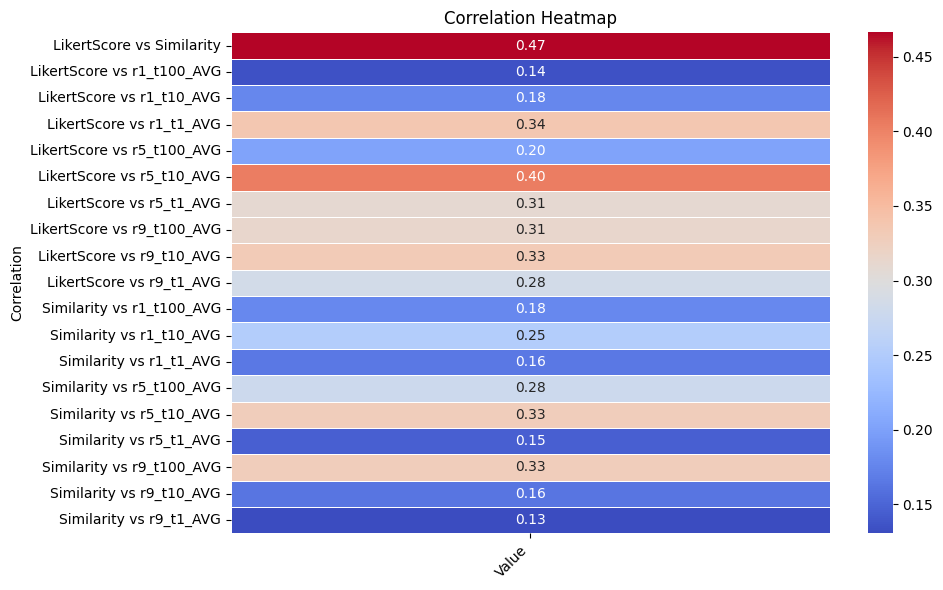

In [ ]:
# prompt: generate 2 heatmaps that show the correlation of each config (one with lickert score and one with cosine similarity)

# Assuming corr_df3 is the DataFrame with the correlations you want to plot

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for the heatmap
pivot_table = corr_df3_sorted.pivot_table(index='Correlation', columns=None, values='Value')

# Create the heatmap
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




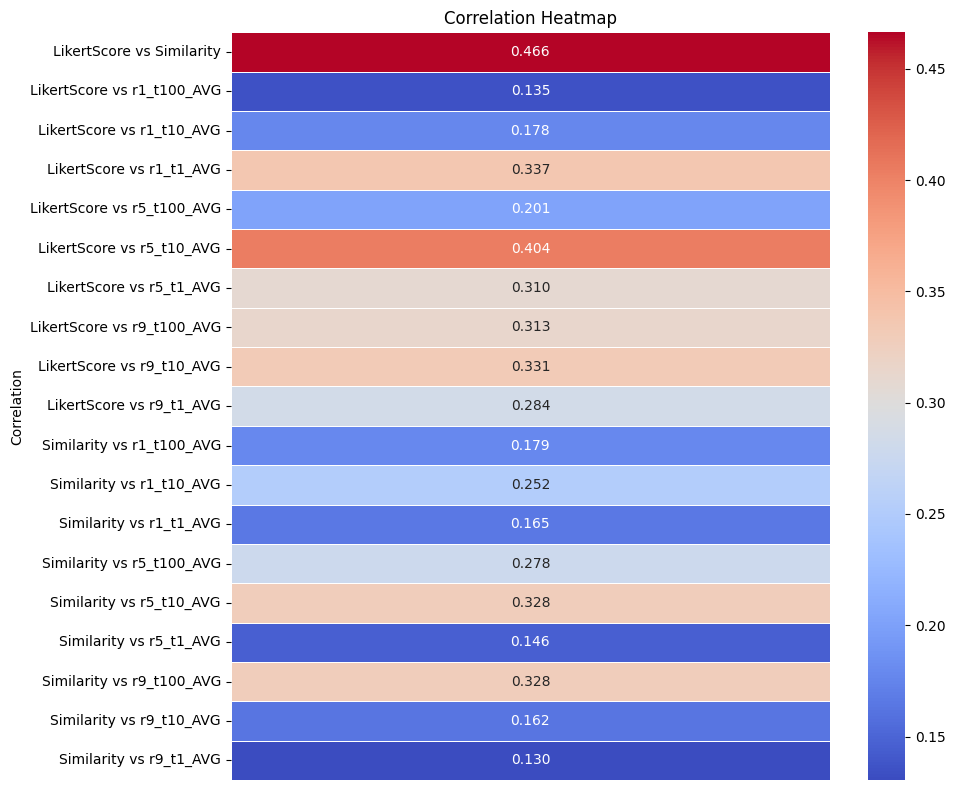

In [ ]:
# prompt: make previous heatmap sorted

# Assuming corr_df3_sorted is the DataFrame with the correlations you want to plot, sorted by 'Value'

# Extract the correlation names and values from the sorted DataFrame
sorted_correlations = corr_df3_sorted['Correlation'].tolist()
sorted_values = corr_df3_sorted['Value'].tolist()

# Create a single-column DataFrame suitable for heatmap (or just use lists)
# For a single column heatmap representation, you often need to reshape the data.
# A simpler approach might be to just plot a bar chart for sorted values.

# If you still want a heatmap-like visualization of sorted values:
# You can create a single column pivot table from the sorted DataFrame.
pivot_sorted = corr_df3_sorted.pivot_table(
    index='Correlation',
    values='Value'
)

# Create the heatmap using the pivot table
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(pivot_sorted, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5) # fmt=".3f" for more precision
plt.title('Correlation Heatmap')
plt.xticks([])  # No x-axis ticks are needed for a single column
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

In [ ]:
import pprint
pprint.pprint(corr_df2)


                 Correlation     Value
0   r5_10_AVG vs LikertScore  0.404248
1   r5_t10_AVG vs Similarity  0.327885
2  LikertScore vs Similarity  0.466414


This triangular analysis reveals whether these methods capture the same or different aspects of semantic relationships. If both methods correlate strongly with Likert scores but weakly with each other, they're capturing complementary aspects of semantic similarity.